# Sistema de Henon-Heiles

Considere un sistema bidimensional no lineal (Henon-Heiles o similar). Resuelva las ecuaciones de movimiento y compruebe la sensibilidad a las condiciones iniciales.

Analicemos el sistema bidimensional regido por el potencial de Henon-Heiles:

\begin{equation}
V(x,y)= \frac{1}{2}\left(x^2+y^2\right)+\lambda\left(x^2y-\frac{y^3}{3}\right)
\end{equation}

El Hamiltoniano asociado al sistema es:

\begin{equation}
H=\frac{1}{2}\left(p_x^2+p_y^2\right)+\frac{1}{2}\left(x^2+y^2\right)+\lambda\left(x^2y-\frac{y^3}{3}\right)
\end{equation}

Las ecuaciones de Hamilton son entonces:

\begin{equation}
\dot x = p_x \\
\dot y = p_y \\
\dot p_x = -x-2\lambda xy \\
\dot p_y = -y - \lambda(x^2-y^2)
\end{equation}

Solucionemos el sistema de ecuaciones diferenciales y analicemos algunos casos específicos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def solve_system(x0,y0,px0,py0,t0,tf): 
    Y0=[x0,y0,px0,py0] #arreglo con las condiciones iniciales 
    t=np.linspace(t0,tf,1000000) #tiempo que dura la vaina

    l=1 #Parámetro lambda 

    def f(Y,t):
        x,y,px,py=Y 

        dx= px
        dpx=-x-2*l*x*y
        dy=py
        dpy=-y-l*(x**2-y**2)

        return ([dx,dy,dpx,dpy])

    sol=odeint(f,Y0,t)
    
    X=sol[:,0]
    Y=sol[:,1]
    PX=sol[:,2]
    PY=sol[:,3]
    
    return X,Y,PX,PY,t

In [3]:
def graphs(x,y,px,py,t):
    plt.figure(figsize=(14,9))
    plt.suptitle("Gráficas del sistema de Henon-Heiles")
    
    plt.subplots_adjust(hspace=0.3)
    
    plt.subplot(221)
    plt.title("Posiciones")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.grid(True)
    plt.plot(x,y,'g-')
    #plt.plot(-.2,.2,'ro',markersize=30)             #Para arbolito de navidad
    #plt.plot(0,0.5,'*',color='yellow',markersize=60)

    plt.subplot(222)
    plt.title("Momentos")
    plt.xlabel("Momento en x")
    plt.ylabel("Momento en y")
    plt.grid(True)
    plt.plot(px,py,'-')
    
    plt.subplot(223)
    plt.title("Espacio de fases")
    plt.xlabel("Posición en x")
    plt.ylabel("Momento en x")
    plt.grid(True)
    plt.plot(x,px,'-')
    
    plt.subplot(224)
    plt.title("Espacio de fases")
    plt.xlabel("Posición en y")
    plt.ylabel("Momento en y")
    plt.grid(True)
    plt.plot(y,py,'g-')

In [4]:
def main(x0,y0,px0,py0,t0,tf):
    sol=solve_system(x0,y0,px0,py0,t0,tf)
    graphs(*sol)

Analizaremos algunos casos con condiciones iniciales completamente distintas. Las gráficas a mostrar son de posición, momentos y espacio de fase, adicionalmente, mostramos animaciones de cada uno de los sistemas escogidos, donde se varía uno de los parámetros iniciales levemente para ver cómo varían las trayectorias simultáneamente.

Iniciemos analizando un caso básico en el que se tienen condiciones iniciales de posición y momento para x, y valores nulos para y.

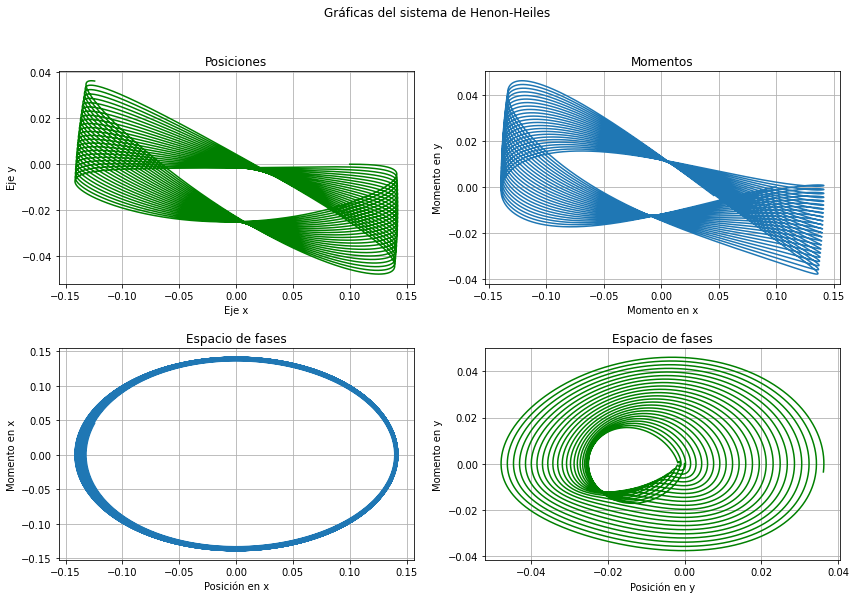

In [5]:
main(0.1,0,0.1,0,0,150) #ani001 

Se tienen variaciones para x y para Px.  El sistema describe trayectorias casi cerradas en el espacio de fases para x y en el gráfico de x vs y describe una trayectoria que va inclinándose con el tiempo. De acuerdo con el espacio de fases para y, el momento en y va creciendo, y crece más rápido entre más crece y, lo que se debe a una transformación de momento del eje x a momento del eje y, tal y como se observa en la animación (ani001.mp4). 

En la animación vemos partículas cuyo momento en y inicial varía 0.01. Vemos que las trayectorias varían principalmente en la inclinación entre ellas, y entre mayor sea el momento, más varía la inclinación de la trayectoria en una oscilación.

Ahora analicemos el caso en el que solo se tiene posición inicial en y y una pequeña variación en el momento de x.

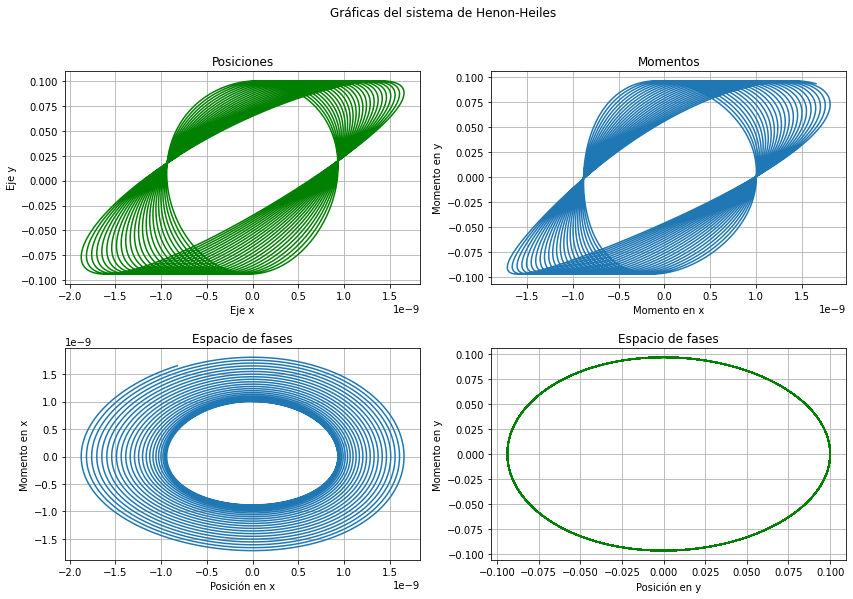

In [6]:
main(0,0.1,0.000000001,0,0,150) #ani002

La pequeña variación en el momento en x ocasiona que la amplitud en x aumente levemente con cada oscilación. En cuanto a y, vemos que su movimiento no varía ni en amplitud ni en momento, tal y como se ve en el espacio de fases de y, lo cual es algo que tiene sentido, puesto que en la ecuación de $\dot p_y$ se puede despreciar x al ser tan pequeño en comparación a y, lo que provoca que sea practicamente invariante.

En la animación correspondiente (ani002.mp4) se varía levemente ($10^{-9}$) el momento en x, lo que provoca que las partículas tengan un ángulo mayor respecto a la vertical. De igual manera, vemos que hay una partícula que oscila en una recta debido a que su momento inicial en x es nulo.

Ahora un caso con todas las condiciones iniciales diferentes de 0.

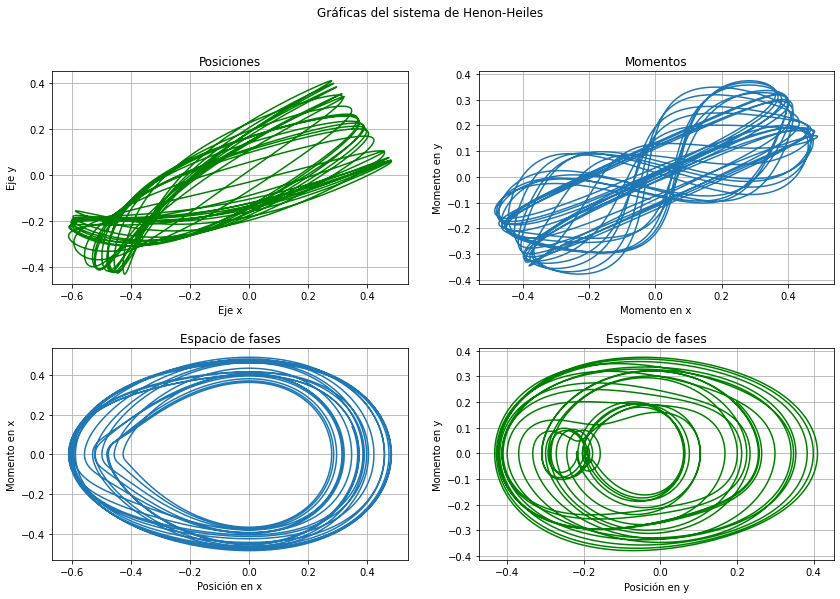

In [7]:
main(0.35,0.2,0.14,0.2,0,150) #ani003 Varía px con paso de 0.02

Se observa que en este caso el movimiento no es simple ni periódico en comparación a los casos anteriores.

En la animación correspondiente (ani003.mp4) se varío levemente (0.02) el momento en x y se observó que a medida que avanzaba el tiempo, las trayectorias eran completamente diferentes, hasta tal punto que no es posible intuir alguna de las trayectorias a partir de las otras, ya que estas no se diferencian por un simple desfase o una pequeña inclinación como en los casos anteriores. De esta manera, vemos que en este caso el sistema es muy sensible al cambio en el momento.

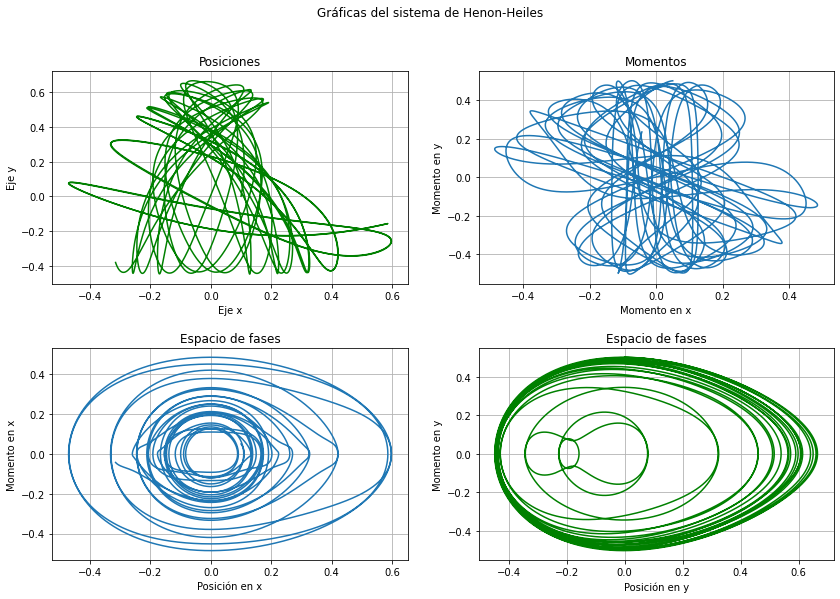

In [9]:
main(0.1,0,0.05,0.5,0,150) #ani004 Variacion de px en 0.01

En este caso, al igual que en el anterior, no hay una periodicidad en ninguna de las gráficas, debido a que las condiciones iniciales son diferentes de cero.

En la animación (ani004.mp4) hay una pequeña variación (0.001) en $p_x$, y al principio todas las trayectorias son aproximadamente iguales, pero al transcurrir determinado tiempo, las trayectorias logran diferenciarse hasta tal punto que no parecieran tener relación, por lo que el sistema es muy susceptible en períodos de tiempo largos a pequeñas variaciones en las condiciones iniciales.